(supervised:svm:svr)=
# Support-Vector Regression (SVR)

Support vector regression is the little brother of support vector machines used for classification.

```{admonition} Self-study task
Get an overview of SVR from [A tutorial on support vector regression](https://alex.smola.org/papers/2004/SmoSch04.pdf). Read section 1 (skip formulas in 1.3 and 1.4), subsections 2.1 and 2.2 (skipping formulas again), subsections 3.1 and 3.2, section 4. Then try to answer the following questions:
* Which loss function is used for SVR formulated as a minimization problem?
* What type of minimization problem has to be solved (linear, quadratic, cubic, general nonlinear)?
* Is the term *feature space* used to denote the same thing in the paper and in our book?
* Can SVR cope with high-dimensional feature spaces (in our terminology) similar to SVM?
```

## SVR with Scikit-Learn

Scikit-Learn implements SVR in [`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.svm as svm

rng = np.random.default_rng(0)

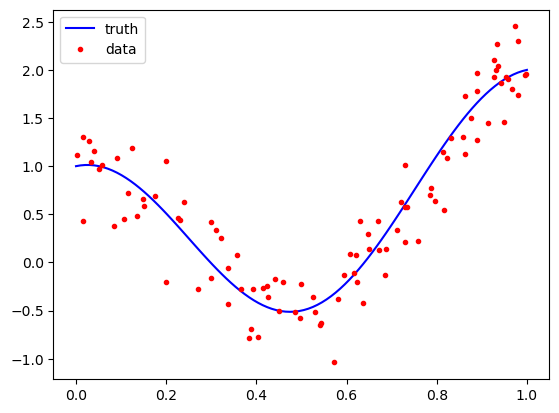

In [2]:
def truth(x):
    return x + np.cos(2 * np.pi * x)

xmin = 0
xmax = 1
x = np.linspace(xmin, xmax, 100)

n = 100    # number of data points to generate
noise_level = 0.3    # standard deviation of artificial noise

# simulate data
X = (xmax - xmin) * rng.random((n, 1)) + xmin
y = truth(X).reshape(-1) + noise_level * rng.standard_normal(n)

# plot truth and data
fig, ax = plt.subplots()
ax.plot(x, truth(x), '-b', label='truth')
ax.plot(X.reshape(-1), y, 'or', markersize=3, label='data')
ax.legend()
plt.show()

When creating the `SVR` object we may provide the width of the $\varepsilon$-tube containing data with no influence on the loss function and we may select one of several predefined kernels. The regularization parameter can be specified, too. Here we have to take care, because the higher the parameter the less regularization is applied.

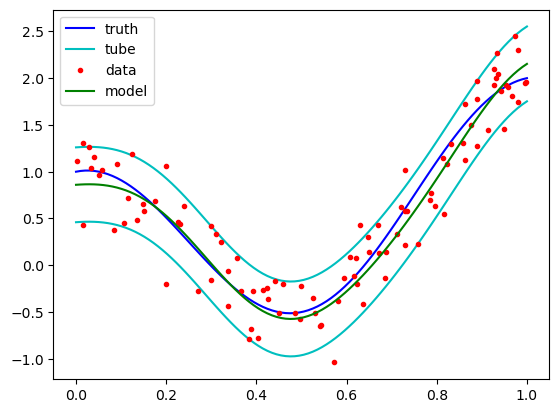

In [4]:
epsilon = 0.4
alpha = 1e-1

# regression
svr = svm.SVR(epsilon=epsilon, kernel='rbf', C=1/alpha)
svr.fit(X, y)

# get hypothesis for plotting
y_svr = svr.predict(x.reshape(-1, 1))

# plot truth, data, hypothesis
fig, ax = plt.subplots()
ax.plot(x, truth(x), '-b', label='truth')
ax.plot(x, y_svr+epsilon, '-c', label='tube')
ax.plot(x, y_svr-epsilon, '-c')
ax.plot(X.reshape(-1), y, 'or', markersize=3, label='data')
ax.plot(x, y_svr, '-g', label='model')
ax.legend()
plt.show()

If regularization is very weak, then the tube contains almost all data points. For higher regularization the fitted hypothesis is smoother, but the tube does not contain all data points.